Mega Cap Tech LSTM Prediction Model

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas.util.testing import assert_frame_equal

# For time stamps
from datetime import datetime

Build Dataframes for historical price and volume data

In [16]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'TSLA', 'AMZN']

# Set up End and Start times 
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Dictionary to store DataFrames for each stock
tech_data = {}

# yahoo finance data and setting as a DataFrame
for stock in tech_list:
    # Fetch data
    data = yf.download(stock, start=start, end=end)
    
    # Store data in dictionary
    tech_data[stock] = data

# Print the first few rows of each DataFrame
for stock, data in tech_data.items():
    print(f"Data for {stock}:")
    print(data.head())

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Data for AAPL:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-04-19  165.800003  168.160004  165.539993  167.630005  166.739990   
2023-04-20  166.089996  167.869995  165.559998  166.649994  165.765198   
2023-04-21  165.050003  166.449997  164.490005  165.020004  164.143860   
2023-04-24  165.000000  165.600006  163.889999  165.330002  164.452209   
2023-04-25  165.190002  166.309998  163.729996  163.770004  162.900497   

              Volume  
Date                  
2023-04-19  47720200  
2023-04-20  52456400  
2023-04-21  58337300  
2023-04-24  41949600  
2023-04-25  48714100  

Data for GOOG:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-04-19  104.214996  105.724998  103.800003  105.019997  105.019997   
2023-04-20  104.650002  106.888000  104.639999  105.900002  105.900

In [49]:
company_list = [tech_data[stock] for stock in tech_list]

# Add company_name as a column to each DataFrame
for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

# Concatenate the DataFrames in company_list
df = pd.concat(company_list, axis=0)

# Sort the DataFrame by index (date)
df.sort_index(inplace=True)

# Print the last 10 rows of the DataFrame
print(df.tail(10))

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-04-17  169.610001  170.649994  168.000000  168.000000  168.000000   
2024-04-17  157.190002  158.681000  156.134995  156.880005  156.880005   
2024-04-18  410.630005  411.890015  403.950012  404.269989  404.269989   
2024-04-18  181.470001  182.389999  178.649994  179.220001  179.220001   
2024-04-18  156.925003  158.485001  156.210007  157.460007  157.460007   
2024-04-18  168.029999  168.639999  166.550003  167.039993  167.039993   
2024-04-19  157.750000  157.990005  155.520004  156.130005  156.130005   
2024-04-19  166.119995  166.399994  164.820007  165.240005  165.240005   
2024-04-19  404.029999  405.480011  399.399994  400.790009  400.790009   
2024-04-19  178.889999  179.000000  175.449997  176.110001  176.110001   

              Volume company_name       MA_10       MA_20       MA_50  \
Date                                  

In [21]:
# Access the DataFrame for AAPL from the tech_data dictionary
aapl_data = tech_data['AAPL']

# Generate summary statistics
summary_stats = aapl_data.describe()

# Print the summary statistics
print(summary_stats)


             Open        High         Low       Close   Adj Close  \
count  253.000000  253.000000  253.000000  253.000000  253.000000   
mean   180.996285  182.460593  179.647312  181.114111  180.701509   
std      8.891412    8.745538    8.836944    8.825191    8.826065   
min    163.059998  165.279999  162.800003  163.759995  162.890549   
25%    173.149994  174.589996  171.960007  173.570007  173.210495   
50%    180.089996  181.929993  178.330002  180.570007  179.859741   
75%    189.259995  189.990005  187.610001  189.300003  188.850006   
max    198.020004  199.619995  197.000000  198.110001  197.857529   

             Volume  
count  2.530000e+02  
mean   5.762738e+07  
std    1.777962e+07  
min    1.742749e+07  
25%    4.663810e+07  
50%    5.366560e+07  
75%    6.384130e+07  
max    1.366826e+08  


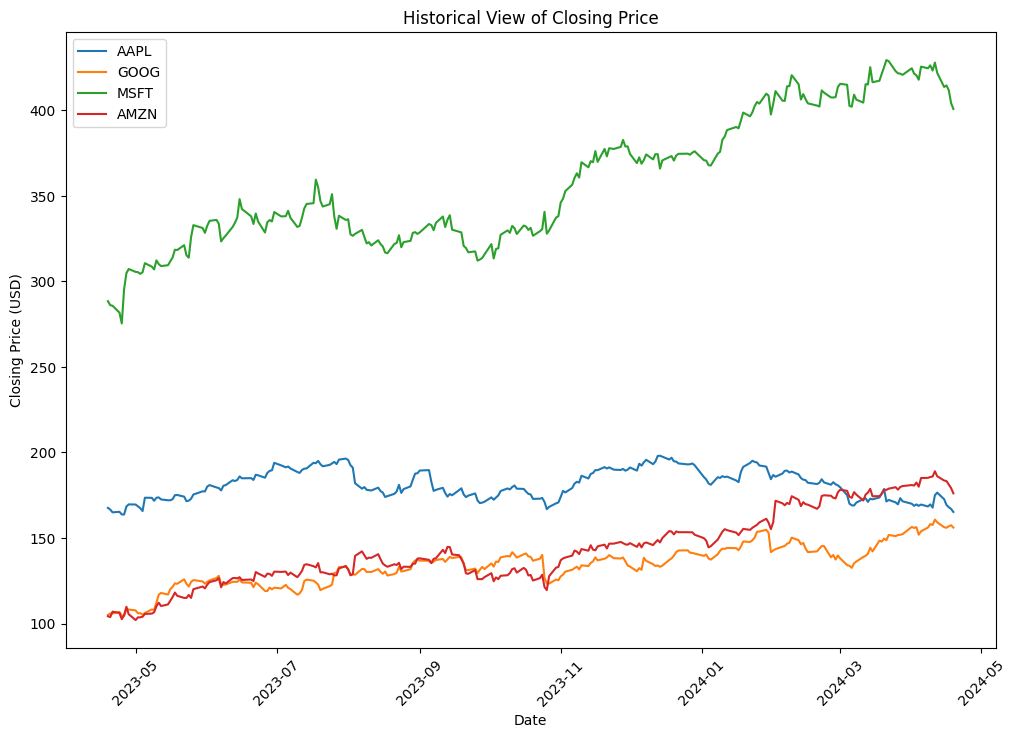

In [28]:
# Let's see a historical view of the closing price
plt.figure(figsize=(12, 8))

# Plot the closing price for each stock
for stock in tech_list:
    plt.plot(tech_data[stock].index, tech_data[stock]['Close'], label=stock)

# Set plot title and labels
plt.title('Historical View of Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.show()


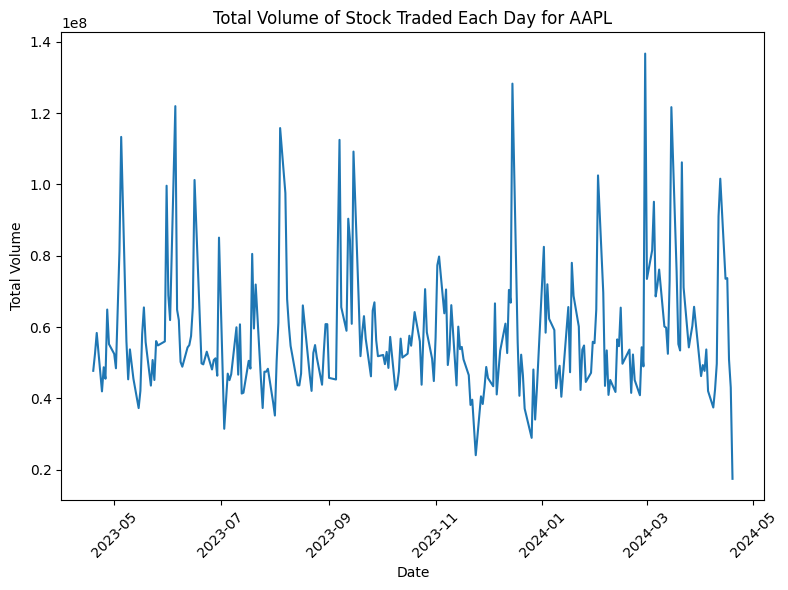

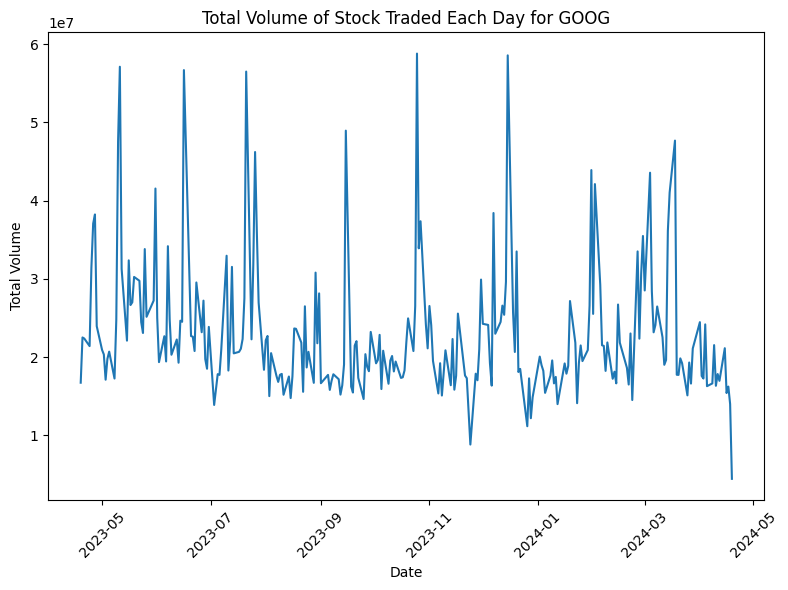

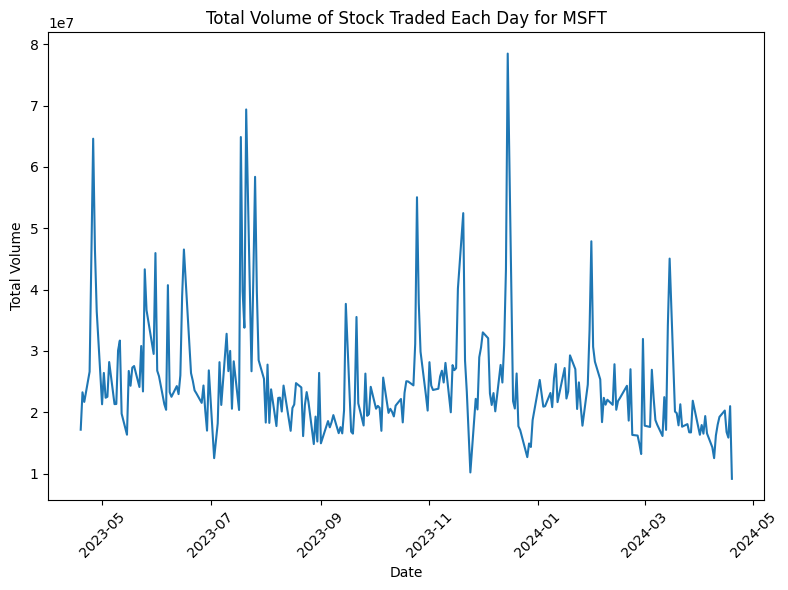

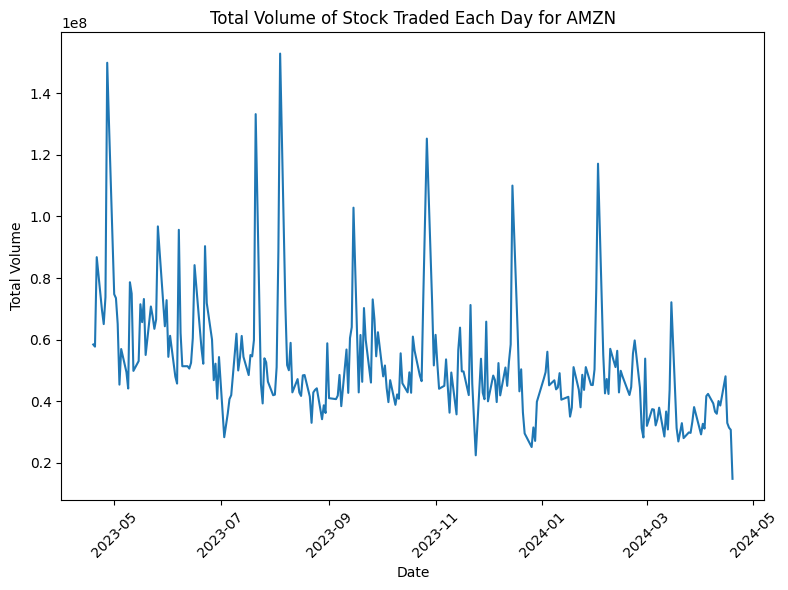

In [31]:
# Plot the total volume of stock traded each day for each stock separately
for stock in tech_list:
    plt.figure(figsize=(8, 6))
    
    # Plot the total volume of stock traded each day for the current stock
    plt.plot(tech_data[stock].index, tech_data[stock]['Volume'])
    
    # Set plot title and labels
    plt.title(f'Total Volume of Stock Traded Each Day for {stock}')
    plt.xlabel('Date')
    plt.ylabel('Total Volume')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Show plot
    plt.tight_layout()  # Adjust layout to prevent overlap of titles
    plt.show()


Moving Averages 

In [32]:
# Moving averages to calculate
ma_day = [10, 20, 50]

# Calculate moving averages for each stock separately
for stock in tech_list:
    for ma in ma_day:
        # Add moving average to the DataFrame
        tech_data[stock][f'MA_{ma}'] = tech_data[stock]['Close'].rolling(window=ma).mean()

# Print the last few rows of each stock's DataFrame to verify the moving averages are added
for stock in tech_list:
    print(f"Last few rows of DataFrame for {stock}:")
    print(tech_data[stock].tail())
  


Last few rows of DataFrame for AAPL:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-04-15  175.360001  176.630005  172.500000  172.690002  172.690002   
2024-04-16  171.750000  173.759995  168.270004  169.380005  169.380005   
2024-04-17  169.610001  170.649994  168.000000  168.000000  168.000000   
2024-04-18  168.029999  168.639999  166.550003  167.039993  167.039993   
2024-04-19  166.119995  166.399994  164.820007  165.240005  165.240005   

              Volume company_name       MA_10       MA_20     MA_50  
Date                                                                 
2024-04-15  73531800        APPLE  170.706999  171.728500  176.7936  
2024-04-16  73711200        APPLE  170.761000  171.511500  176.4642  
2024-04-17  50901200        APPLE  170.596001  171.107500  176.0706  
2024-04-18  43038700        APPLE  170.417999  170.525999  175.6254  
2024-04-19  17427492    

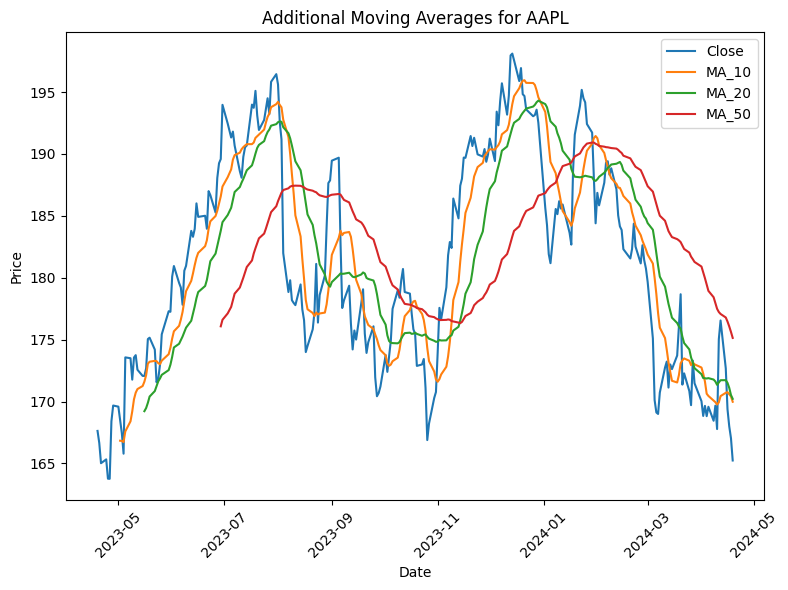

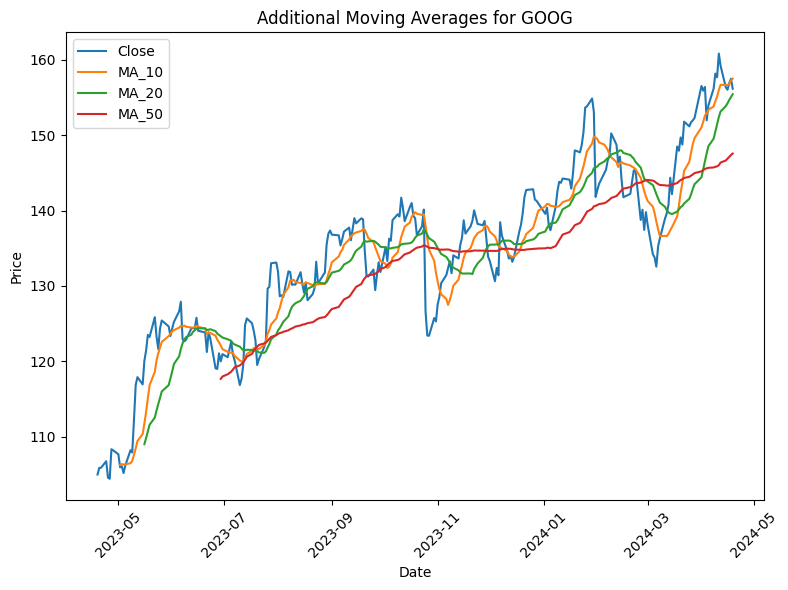

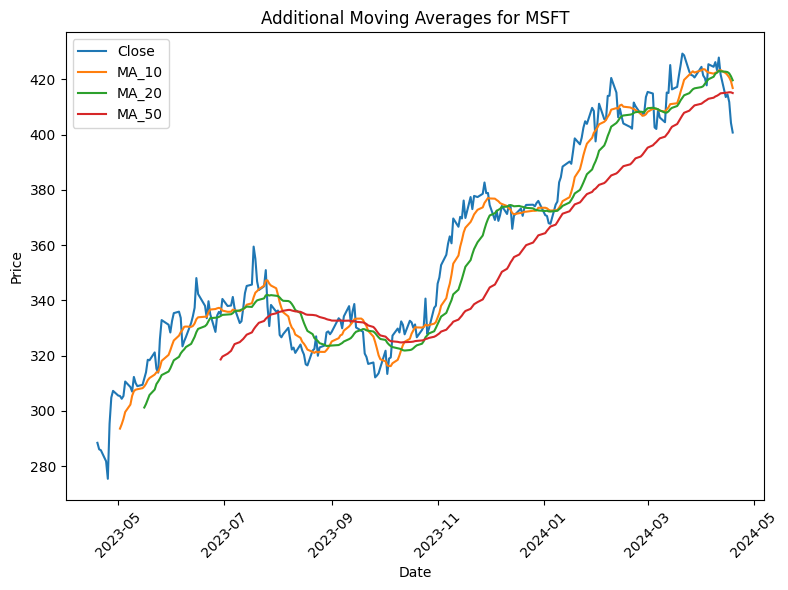

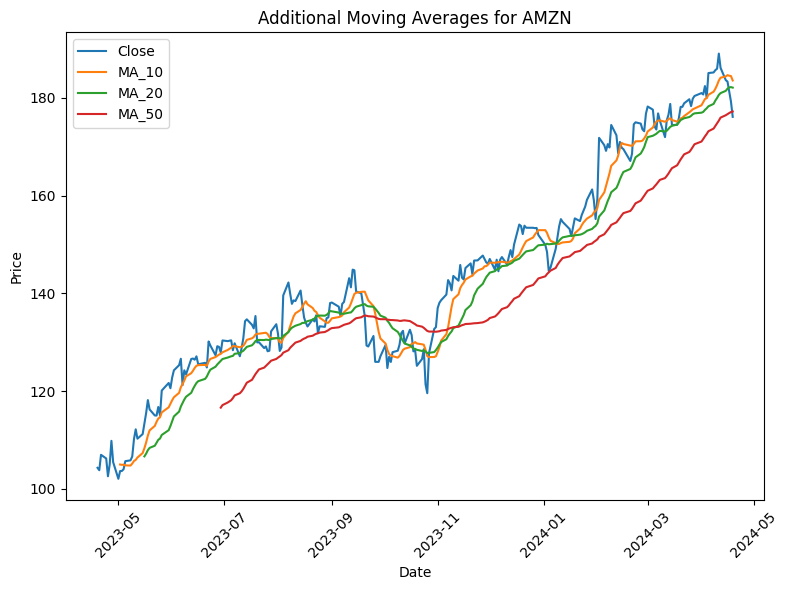

In [33]:
# Plot additional moving averages for each stock separately
for stock in tech_list:
    plt.figure(figsize=(8, 6))
    
    # Plot the closing price
    plt.plot(tech_data[stock].index, tech_data[stock]['Close'], label='Close')
    
    # Plot additional moving averages
    for ma in ma_day:
        plt.plot(tech_data[stock].index, tech_data[stock][f'MA_{ma}'], label=f'MA_{ma}')
    
    # Set plot title and labels
    plt.title(f'Additional Moving Averages for {stock}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    
    # Add legend
    plt.legend()
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Show plot
    plt.tight_layout()  # Adjust layout to prevent overlap of titles
    plt.show()


In [35]:
# Calculate daily returns for each stock separately
for stock in tech_list:
    # Add a new column for daily returns to the DataFrame
    tech_data[stock]['Daily_Return'] = tech_data[stock]['Close'].pct_change()

# Print the last few rows of each stock's DataFrame to verify the daily returns are added
for stock in tech_list:
    print(f"Last few rows of DataFrame for {stock}:")
    print(tech_data[stock].head())
   


Last few rows of DataFrame for AAPL:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-04-19  165.800003  168.160004  165.539993  167.630005  166.739990   
2023-04-20  166.089996  167.869995  165.559998  166.649994  165.765198   
2023-04-21  165.050003  166.449997  164.490005  165.020004  164.143860   
2023-04-24  165.000000  165.600006  163.889999  165.330002  164.452209   
2023-04-25  165.190002  166.309998  163.729996  163.770004  162.900497   

              Volume company_name  MA_10  MA_20  MA_50  Daily_Return  
Date                                                                  
2023-04-19  47720200        APPLE    NaN    NaN    NaN           NaN  
2023-04-20  52456400        APPLE    NaN    NaN    NaN     -0.005846  
2023-04-21  58337300        APPLE    NaN    NaN    NaN     -0.009781  
2023-04-24  41949600        APPLE    NaN    NaN    NaN      0.001879  
2023-04-25  487141

Exploratory Analysis

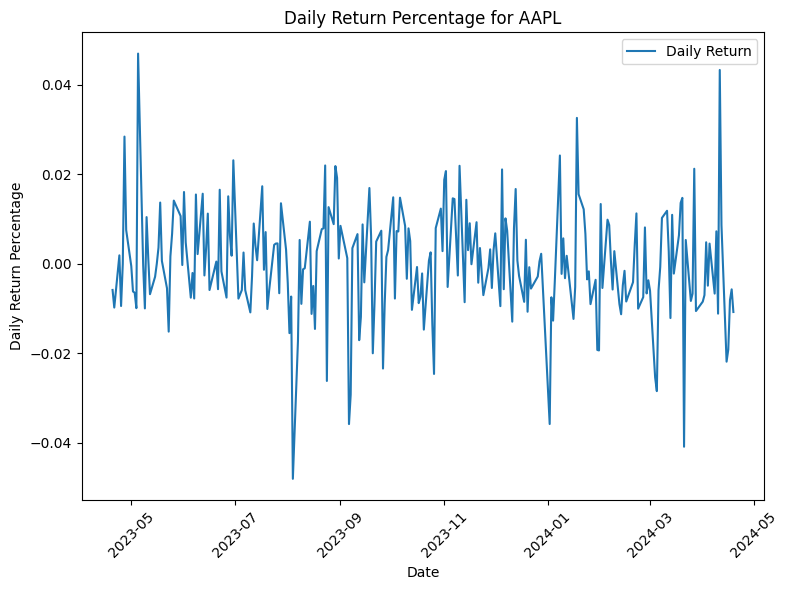

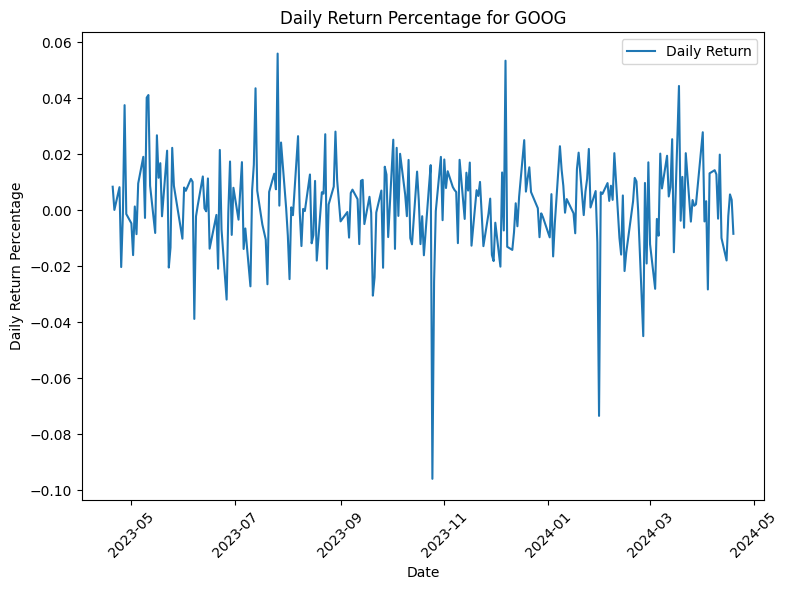

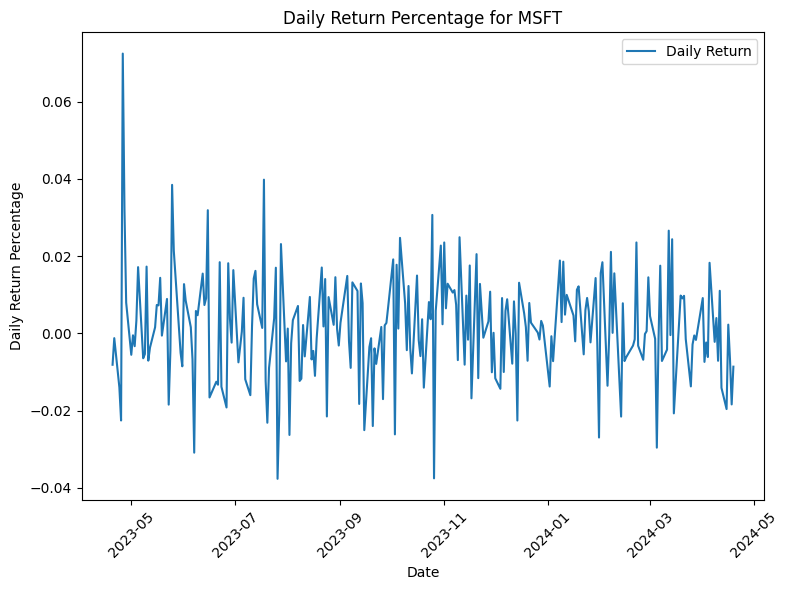

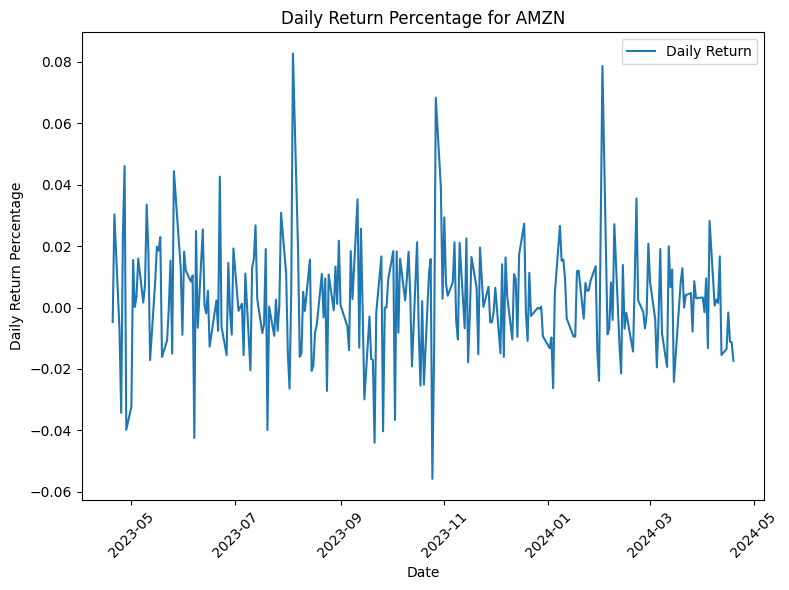

In [36]:
# Plot daily return percentage for each stock separately
for stock in tech_list:
    plt.figure(figsize=(8, 6))
    
    # Plot the daily return percentage
    plt.plot(tech_data[stock].index, tech_data[stock]['Daily_Return'], label='Daily Return')
    
    # Set plot title and labels
    plt.title(f'Daily Return Percentage for {stock}')
    plt.xlabel('Date')
    plt.ylabel('Daily Return Percentage')
    
    # Add legend
    plt.legend()
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Show plot
    plt.tight_layout()  # Adjust layout to prevent overlap of titles
    plt.show()

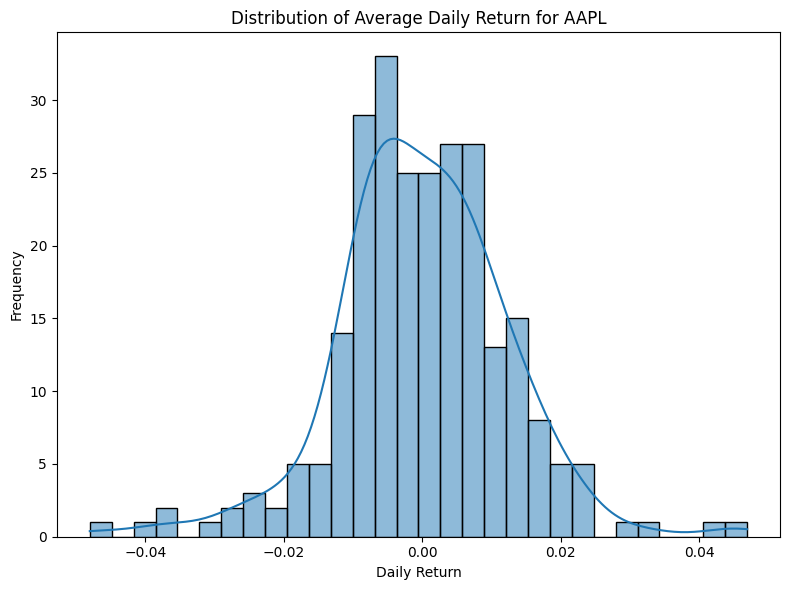

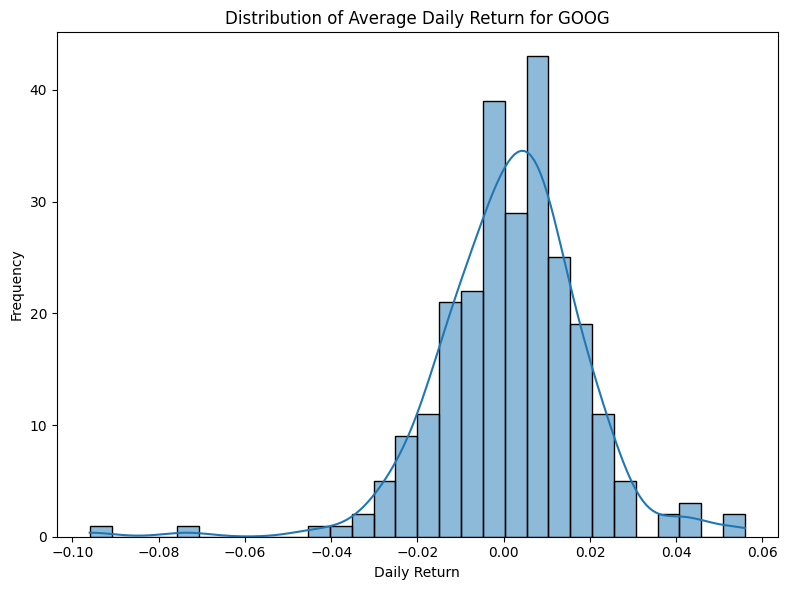

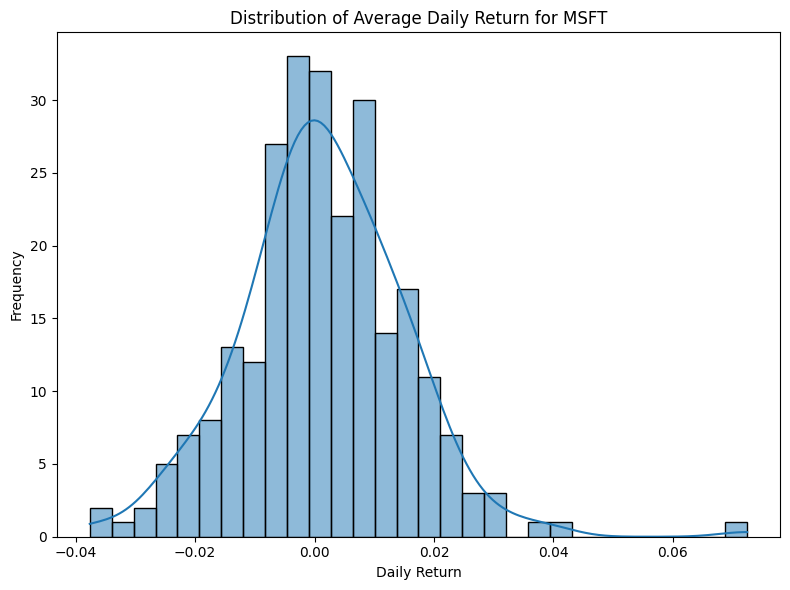

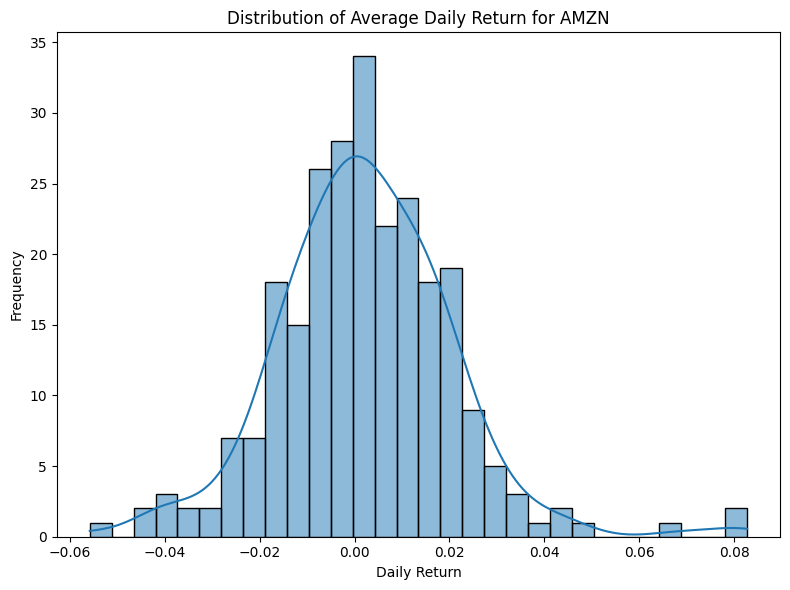

In [38]:
# Plot histogram and KDE for average daily return for each stock separately
for stock in tech_list:
    plt.figure(figsize=(8, 6))
    
    # Drop NaN values from the daily return column
    daily_return_without_nan = tech_data[stock]['Daily_Return'].dropna()
    
    # Plot histogram and KDE
    sns.histplot(daily_return_without_nan, kde=True, bins=30)
    
    # Set plot title and labels
    plt.title(f'Distribution of Average Daily Return for {stock}')
    plt.xlabel('Daily Return')
    plt.ylabel('Frequency')
    
    # Show plot
    plt.tight_layout()
    plt.show()

                  AAPL        GOOG        MSFT        AMZN
Date                                                      
2023-04-19  167.630005  105.019997  288.450012  104.300003
2023-04-20  166.649994  105.900002  286.109985  103.809998
2023-04-21  165.020004  105.910004  285.760010  106.959999
2023-04-24  165.330002  106.779999  281.769989  106.209999
2023-04-25  163.770004  104.610001  275.420013  102.570000


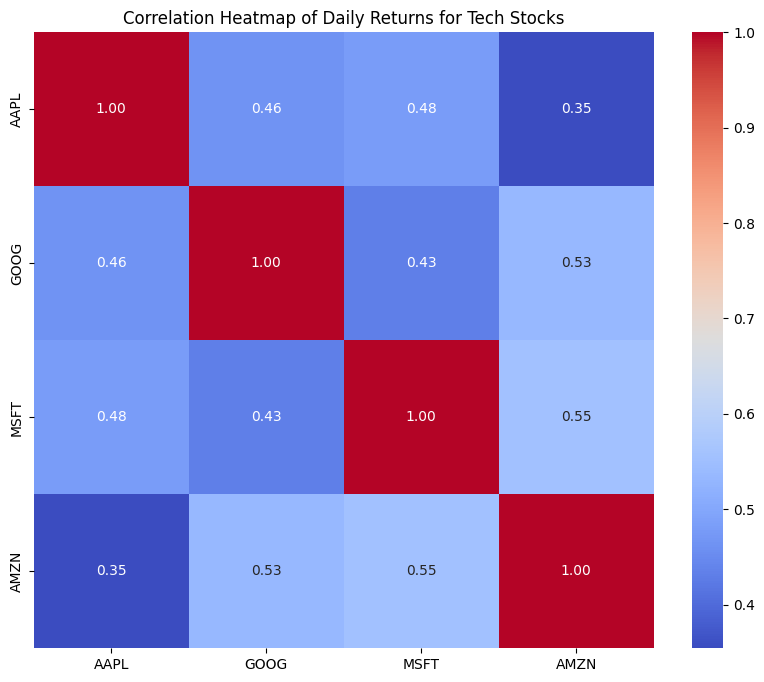

In [45]:
# Initialize an empty DataFrame to store close prices for all stocks
close_prices_df = pd.DataFrame()

# Add the 'Close' column for each stock to the DataFrame
for stock in tech_list:
    close_prices_df[stock] = tech_data[stock]['Close']

# Print the first few rows of the DataFrame to verify the data
print(close_prices_df.head())

# Make a new tech returns DataFrame
tech_rets = close_prices_df.pct_change()
tech_rets.head()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(tech_rets.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Daily Returns for Tech Stocks')
plt.show()

<Axes: >

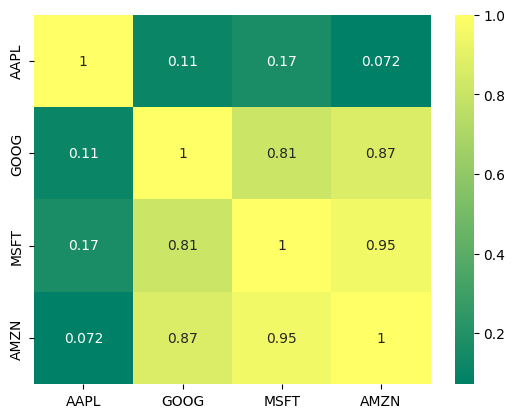

In [46]:
sns.heatmap(close_prices_df.corr(), annot=True, cmap='summer')

Risk Analysis 

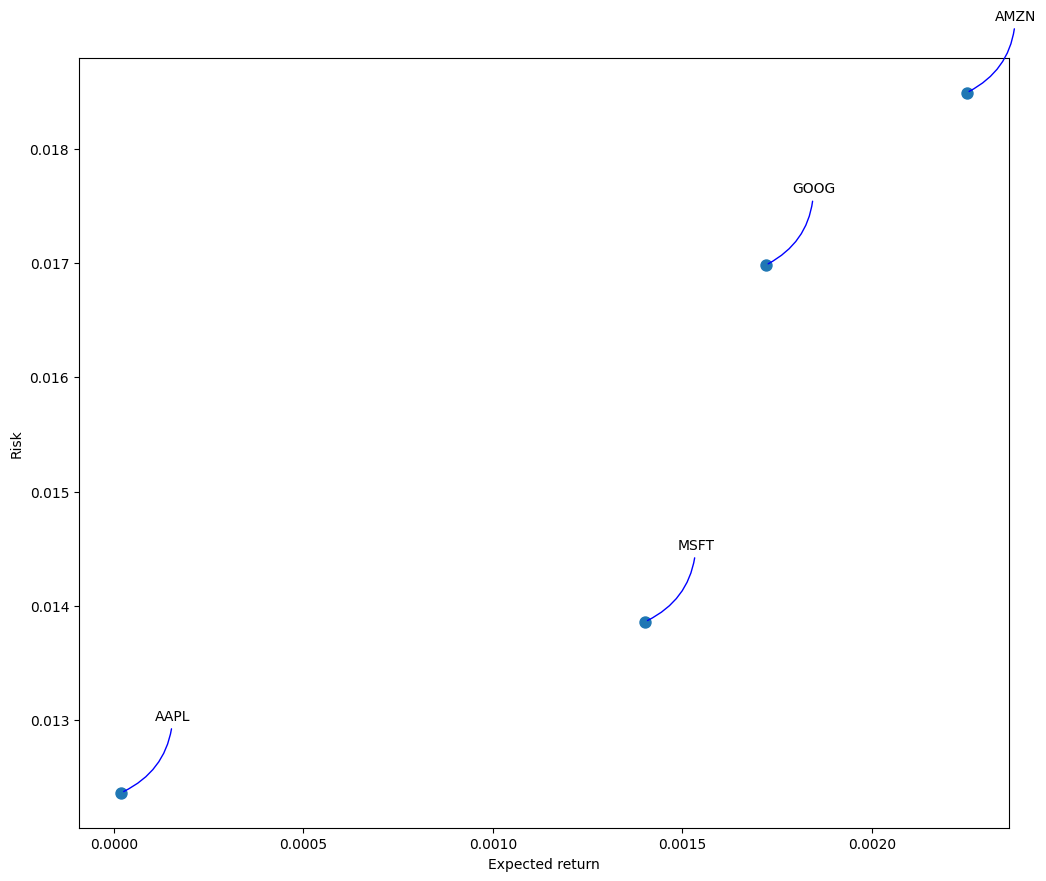

In [47]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi*20

plt.figure(figsize=(12, 10))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

LSTM Model  

In [53]:
df = yf.download('AAPL', start='2012-01-01', end=end)
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.433826,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.500644,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.639426,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.771556,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.751298,394024400
...,...,...,...,...,...,...
2024-04-12,174.259995,178.360001,174.210007,176.550003,176.550003,101593300
2024-04-15,175.360001,176.630005,172.500000,172.690002,172.690002,73531800
2024-04-16,171.750000,173.759995,168.270004,169.380005,169.380005,73711200


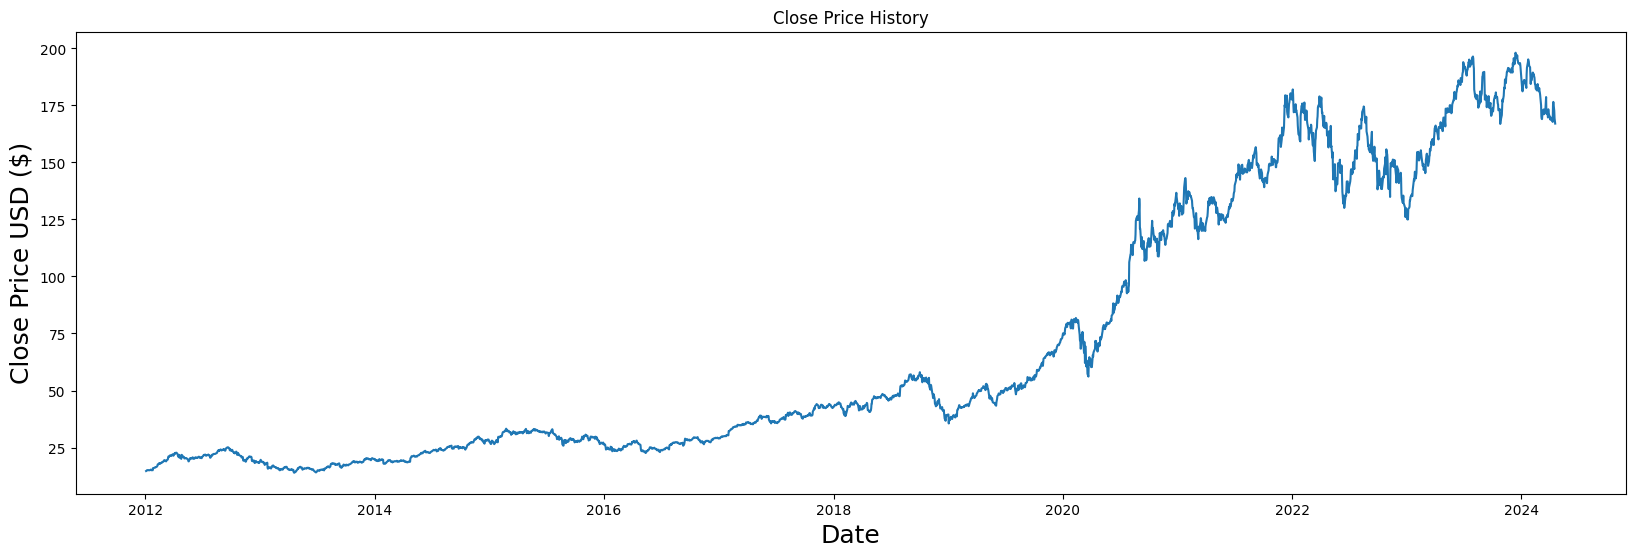

In [54]:
plt.figure(figsize=(20,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()


In [55]:
#Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .8 ))

training_data_len

2475

In [56]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00401431],
       [0.00444289],
       [0.00533302],
       ...,
       [0.84399649],
       [0.83650309],
       [0.83129026]])

In [57]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.00401431, 0.00444289, 0.00533302, 0.00618049, 0.00605056,
       0.00634339, 0.00620958, 0.00598462, 0.00567821, 0.00662652,
       0.00748175, 0.007218  , 0.00577323, 0.00715207, 0.00579457,
       0.01088518, 0.01049151, 0.01100542, 0.01211663, 0.01278955,
       0.01273332, 0.01252582, 0.01341013, 0.01424207, 0.01518457,
       0.01670691, 0.01990478, 0.01995326, 0.02173353, 0.02306387,
       0.02077746, 0.02165789, 0.02164044, 0.02410915, 0.02375813,
       0.02440779, 0.02557523, 0.0262249 , 0.02809631, 0.02945961,
       0.02985329, 0.02999098, 0.02765997, 0.02709757, 0.02718096,
       0.02937236, 0.02998905, 0.03131358, 0.03443581, 0.03860139,
       0.0378218 , 0.03782373, 0.04083544, 0.04177794, 0.04110694,
       0.04049413, 0.03985611, 0.04197573, 0.0434302 , 0.04403914])]
[0.042534249860459186]

[array([0.00401431, 0.00444289, 0.00533302, 0.00618049, 0.00605056,
       0.00634339, 0.00620958, 0.00598462, 0.00567821, 0.00662652,
       0.00748175, 0.007218  , 0.0

In [58]:
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2415, 60, 1)

In [59]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [60]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2415/2415 [==============================] - 22s 9ms/step - loss: 7.2878e-04


In [63]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [64]:
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

20/20 [==============================] - 0s 5ms/step


In [65]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5.596845335677234

/var/folders/60/3nkvzscs6tbfw07943dj271h0000gn/T/ipykernel_60223/2450051769.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


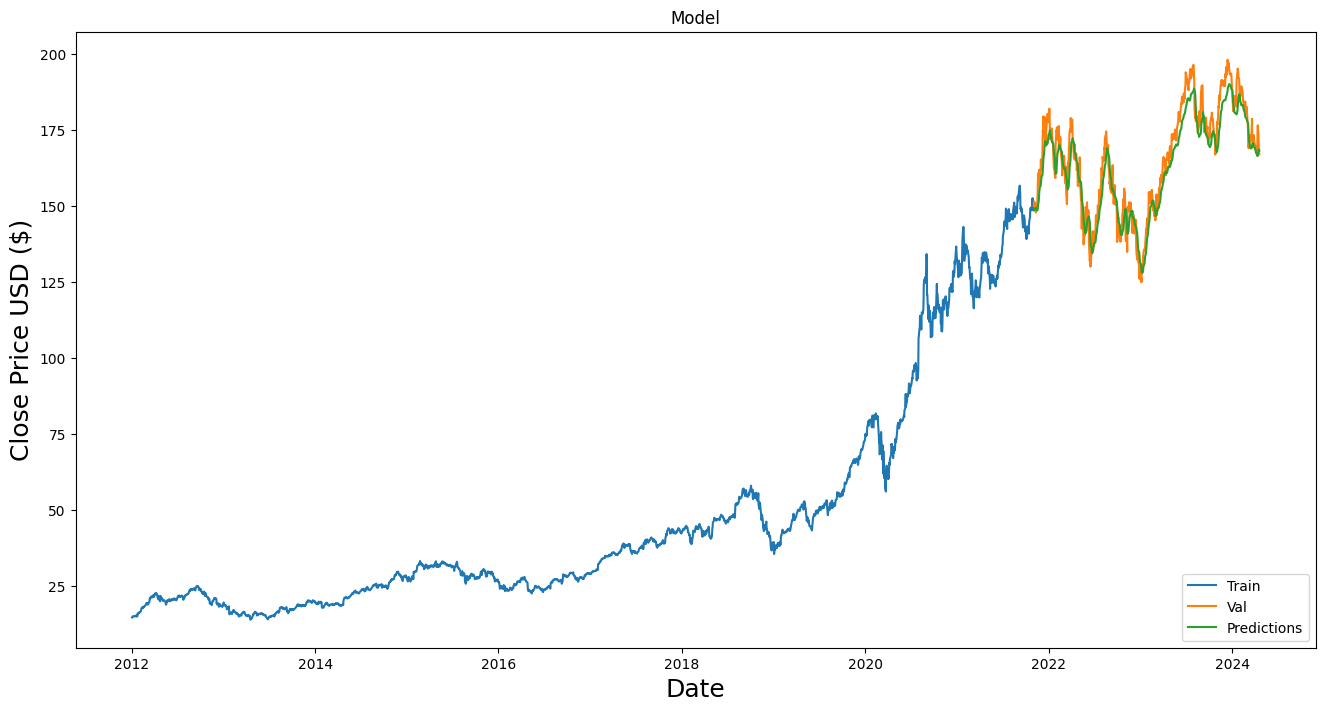

,Close,Predictions
Date,,
2021-11-02,150.020004,148.513901
2021-11-03,151.490005,148.623032
2021-11-04,150.960007,148.873474
2021-11-05,151.279999,149.095032
2021-11-08,150.440002,149.317261
...,...,...
2024-04-12,176.550003,166.930984
2024-04-15,172.690002,167.894363
2024-04-16,169.380005,168.520660


In [67]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()
print(valid)